In [116]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [117]:
#orders_qu.csv
url = 'https://drive.google.com/file/d/13XUqmvBIxz-0fxD8tezDhPXoHveFx8OJ/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)
#orderlines_qu.csv
url = 'https://drive.google.com/file/d/11l2EyoYD09O0LTq98i96m_axWMKk4x8j/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)
#products_cl.csv
url = 'https://drive.google.com/file/d/1_o3pIG1IXE-mNMDSHoAxTx4YIw3EUK1B/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)
#brands.csv
url='https://drive.google.com/file/d/1WdNSDhvF3q4zpIONSC9NoRGnMBakiiZ8/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)



**For this part of my code I did categorize regarding desc and name columns, and after that, I used to merge for joining the CSV's.,**

In [119]:

 orderline_product= orderlines_qu.merge(products_cl, on = 'sku', how = 'left')

In [120]:
orderline_product['discount'] = (orderline_product.price) - (orderline_product.unit_price)

In [121]:
orderline_product['unit_price_total'] = (orderline_product.unit_price)* (orderline_product.product_quantity)
orderline_product['original_price'] = (orderline_product.price)* (orderline_product.product_quantity)

In [122]:
orders_qu

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed
40981,527070,2018-03-14 11:50:48,24.97,Completed
40982,527074,2018-03-14 11:51:42,24.97,Completed
40983,527096,2018-03-14 11:58:40,34.96,Completed


In [123]:
orderline_product['my_categories'] = ''

In [124]:
orderline_product.loc[orderline_product['name'].str.contains('iphone case|Case MacBook |smart cover pro|air',  case = False), 'my_categories'] += ", Phone Accessories"
orderline_product.loc[(orderline_product['desc'].str.contains('RAM|hard|Mac Memory',  case = False)) | (orderline_product['name'].str.contains('expansion kit',  case = False)), 'my_categories'] += ", Internal Hardware"
orderline_product.loc[orderline_product["name"].str.contains("imac|iMac 27|mac mini|mac pro|air", case=False), 'my_categories'] += ", desktop"
orderline_product.loc[orderline_product["desc"].str.contains("^.{0,7}Repair service|repair service", case=False), 'my_categories'] += ", repair"
orderline_product.loc[orderline_product['name'].str.contains('USB',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product['name'].str.contains('Monitor  ',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product['name'].str.contains('Cable',  case = False), 'my_categories'] += ", Phone Accessories"
orderline_product.loc[orderline_product['name'].str.contains('Headphones| Headset',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product['name'].str.contains('SSD',  case = False), 'my_categories'] += ", Internal Hardware"
orderline_product.loc[orderline_product['desc'].str.contains('speaker',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product["name"].str.contains("Macbook Pro", case=False), 'my_categories'] += ", desktop"
orderline_product.loc[orderline_product['desc'].str.contains('Memory',  case = False), 'my_categories'] += ", Internal Hardware"
orderline_product.loc[orderline_product['name'].str.contains('D-Link|TP-LINK',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product['name'].str.contains('Pen|Pointer|pointer',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product['name'].str.contains('Hard Drive',  case = False), 'my_categories'] += ", Internal Hardware"
orderline_product.loc[orderline_product['name'].str.contains('38mm|42mm',  case = False), 'my_categories'] += ", Phone Accessories"
orderline_product.loc[orderline_product['name'].str.contains('battery|Battery',  case = False), 'my_categories'] += ", Internal Hardware"
orderline_product.loc[orderline_product['name'].str.contains('Charger|charger',  case = False), 'my_categories'] += ", External Hardware"
orderline_product.loc[orderline_product["name"].str.contains("Wacom", case=False), 'my_categories'] += ", desktop"
orderline_product.loc[orderline_product['name'].str.contains('Glass|protector|Protector',  case = False), 'my_categories'] += ", Phone Accessories"
orderline_product.loc[orderline_product['my_categories'] == "", 'my_categories'] += ", others"


In [125]:
orderline_product.my_categories.value_counts().head(20)

,count
my_categories,
", others",17143
", External Hardware",7561
", Internal Hardware",5564
", Phone Accessories",4282
", Internal Hardware, Internal Hardware",3151
", desktop",2344
", Internal Hardware, External Hardware, Internal Hardware",1946
", External Hardware, Phone Accessories",1387
", Internal Hardware, External Hardware",1265


**Why I did the second part of categorization because I needed to sum all names and define them as subcategory.**

In [126]:
import re

In [127]:
orderline_product['my_categories_1'] = ''

In [128]:
orderline_product.loc[orderline_product['my_categories'].str.contains('^.{0,7}External Hardware', case=False), 'my_categories_1'] += 'External_Hardware'
orderline_product.loc[orderline_product['my_categories'].str.contains('^.{0,7}Internal Hardware', case=False), 'my_categories_1'] += 'Internal_Hardware'
orderline_product.loc[orderline_product['my_categories'].str.contains('^.{0,7}Phone Accessories', case=False), 'my_categories_1'] += 'Phone_Accessories'
#product_category_df.loc[product_category_df['my_categories'].str.contains('^.{0,7}repair', case=False), 'my_categories_1'] += 'repair'
orderline_product.loc[orderline_product['my_categories'].str.contains(r'\brepair\b', case=False, na=False), 'my_categories_1'] = 'services'
orderline_product.loc[orderline_product['my_categories'].str.contains('^.{0,7}desktop', case=False), 'my_categories_1'] += 'desktop'
orderline_product.loc[orderline_product['my_categories_1'] == "", 'my_categories_1'] += "others"

In [129]:
orderline_product.my_categories_1.value_counts()

,count
my_categories_1,
others,17143
Internal_Hardware,13279
External_Hardware,10947
Phone_Accessories,7782
desktop,3983
services,97


In [130]:
final_df= orderline_product.merge(orders_qu, left_on = 'id_order', right_on = 'order_id')
final_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,type,discount,unit_price_total,original_price,my_categories,my_categories_1,order_id,created_date,total_paid,state
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,12755395,13.50,47.49,60.99,", desktop",desktop,299545,2017-01-01 01:51:47,51.48,Completed
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,...,5720,3.96,18.99,22.95,", others",others,299546,2017-01-01 01:57:34,18.99,Completed
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,...,13005399,16.81,72.19,89.00,", desktop, External Hardware",desktop,295347,2017-01-01 02:02:38,72.19,Completed
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,...,1298,16.09,60.90,76.99,", Internal Hardware, Internal Hardware, Extern...",Internal_Hardware,299556,2017-01-01 02:30:08,65.89,Completed
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,...,11905404,157.50,142.49,299.99,", others",others,299561,2017-01-01 02:39:47,154.48,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,...,1230,15.01,9.99,25.00,", External Hardware, Phone Accessories",External_Hardware,527035,2018-03-14 11:44:34,37.98,Completed
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,...,1230,15.01,19.98,50.00,", External Hardware, Phone Accessories",External_Hardware,527070,2018-03-14 11:50:48,24.97,Completed
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,...,1230,15.01,19.98,50.00,", External Hardware, Phone Accessories",External_Hardware,527074,2018-03-14 11:51:42,24.97,Completed
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,...,1230,15.01,29.97,75.00,", External Hardware, Phone Accessories",External_Hardware,527096,2018-03-14 11:58:40,34.96,Completed


In [131]:
final_df['diffrences'] = (final_df.total_paid) - (final_df.unit_price_total)

In [147]:
final_df.diffrences.sum() , final_df.discount.sum()

(np.float64(3986482.1600000006), np.float64(1390216.63))

In [133]:
category_counts  = final_df.groupby('my_categories_1')['discount'].count()
category_percentage = (category_counts / category_counts.sum()) * 100
category_percentage

,discount
my_categories_1,
External_Hardware,20.565084
Internal_Hardware,24.945990
Phone_Accessories,14.619301
desktop,7.482482
others,32.204918
services,0.182225


**In this part of the code, I tried to show the percentage of each category based on discount.**

<ipython-input-134-6432845318dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = category_counts_df.sort_values(by ='percentage', ascending  = False) , x = 'my_categories_1', y = 'percentage',palette=custom_colors)
<ipython-input-134-6432845318dc>:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data = category_counts_df.sort_values(by ='percentage', ascending  = False) , x = 'my_categories_1', y = 'percentage',palette=custom_colors)


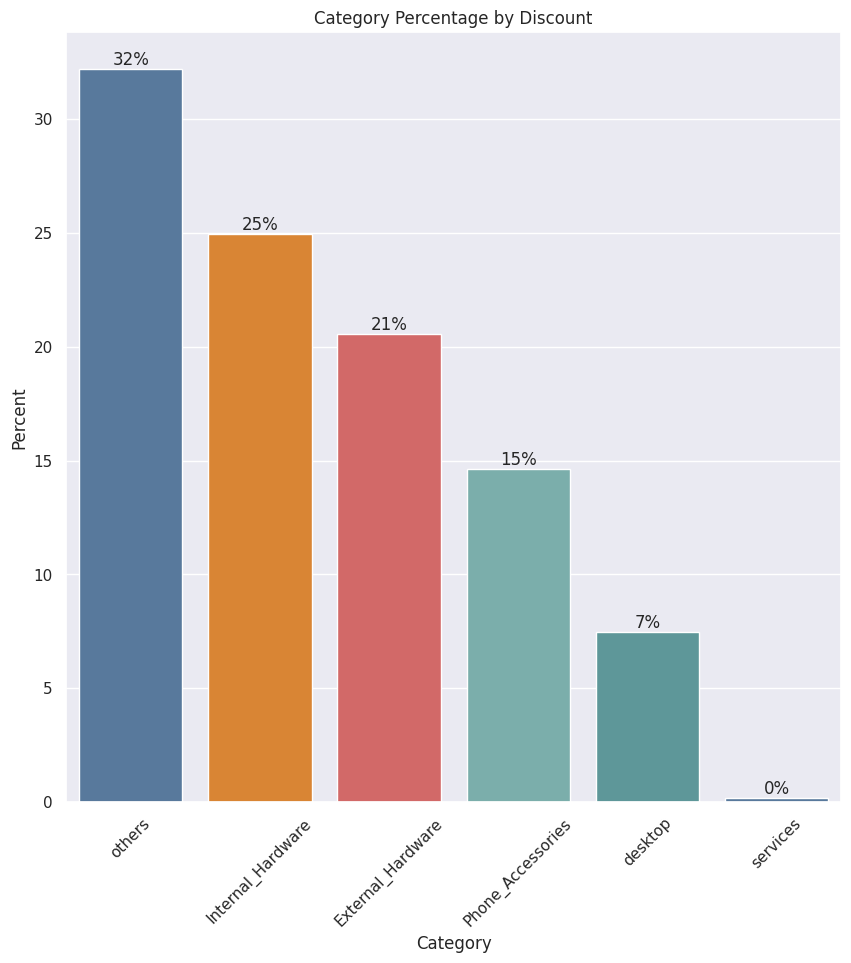

In [134]:
custom_colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A0A3']
category_counts_df = category_percentage.reset_index().rename(columns={'discount' : 'percentage'})
category_counts_df.sort_values(by = 'percentage', ascending = False).round(2)
plt.figure(figsize=(10, 10)) # should exist before barplot to running
ax = sns.barplot(data = category_counts_df.sort_values(by ='percentage', ascending  = False) , x = 'my_categories_1', y = 'percentage',palette=custom_colors)


# Annotate bars with percentage values
for p in ax.patches:# important if we need to add the percent of each category up the bars
    percentage = round(p.get_height(), 0)  # Round to nearest whole number
    ax.annotate(f'{int(percentage)}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set title
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Category Percentage by Discount')
plt.show()